# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [49]:
import sqlite3

# Connect to the database
connection = sqlite3.connect('superhero_db.sqlite')

# Create a cursor object to execute SQL commands
cursor = connection.cursor()

# Delete tables that already exist
cursor.executescript('''
DROP TABLE IF EXISTS heroes;
DROP TABLE IF EXISTS villains;
DROP TABLE IF EXISTS battles;
''')

# Create heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    team TEXT
);
''')

# Create villains table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT
)
''')

# Create battles table
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER NOT NULL,
    outcome TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes (id),
    FOREIGN KEY (villain_id) REFERENCES villains (id)
)
''')

connection.commit()

## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [50]:
import pandas as pd

# Read CSV files into DataFrames
heroes_df = pd.read_csv('csv_files/heroes.csv')
villains_df = pd.read_csv('csv_files/villains.csv')
battles_df = pd.read_csv('csv_files/battles.csv')

# Insert data into SQLite
heroes_df.to_sql('heroes', connection, if_exists='append', index=False)
villains_df.to_sql('villains', connection, if_exists='append', index=False)
battles_df.to_sql('battles', connection, if_exists='append', index=False)

# Print heroes table
print("Heroes:")
cursor.execute('''
  SELECT * FROM heroes
''')
for hero in cursor.fetchall():
    print(hero)

# Print villains table
print("\nVillains:")
cursor.execute('''
  SELECT * FROM villains
''')
for villain in cursor.fetchall():
    print(villain)

# Print battles table
print("\nBattles:")
cursor.execute('''
  SELECT * FROM battles
''')
for battle in cursor.fetchall():
    print(battle)

connection.commit()

Heroes:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')

Villains:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')

Battles:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villai

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [51]:
# 1. Retrieve all superheros and their powers
print("All superheros:")
cursor.execute('''
  SELECT name, power FROM heroes
''')
for hero in cursor.fetchall():
    print(hero)

# 2. Find all battles where the hero won
print("\nBattles where hero won:")
cursor.execute('''
  SELECT heroes.name, villains.name, battles.outcome
  FROM battles
  INNER JOIN heroes ON battles.hero_id = heroes.id
  INNER JOIN villains ON battles.villain_id = villains.id
  WHERE outcome Like 'Hero%'
''')
for battle in cursor.fetchall():
    print(battle)

# 3. List all villains and their evil plans
print("\nVillains and their evil plans:")
cursor.execute('''
  SELECT name, evil_plan FROM villains
''')
for villain in cursor.fetchall():
    print(villain)


# 4. Determine which superhero has fought the most battles
print("\nSuperhero with most battles:")
cursor.execute('''
  SELECT h.name, COUNT(b.id) AS battle_count
  FROM heroes h
  LEFT JOIN battles b ON h.id = b.hero_id
  GROUP BY h.id
  ORDER BY battle_count DESC
''')
print(cursor.fetchone())

All superheros:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')

Battles where hero won:
('Hulk', 'Joker', 'Hero Wins')
('Spider-Man', 'Darkseid', 'Hero Wins')
('Hulk', 'Venom', 'Hero Wins')
('Batman', 'Thanos', 'Hero Wins')
('Black Panther', 'Loki', 'Hero Wins')
('The Flash', 'Magneto', 'Hero Wins')
('Batman', 'Lex Luthor', 'Hero Wins')
('Batman', 'Loki', 'Hero Wins')
('Thor', 'Loki', 'Hero Wins')

Villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Ma

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [52]:
# Create villain deaths table
cursor.executescript('''
DROP TABLE IF EXISTS deaths;
CREATE TABLE IF NOT EXISTS deaths (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    villain_id INTEGER,
    dies TEXT NOT NULL,
    revived TEXT NOT NULL,
    FOREIGN KEY (villain_id) REFERENCES villains (id)
);
''')

# Populate with data (most recent cinematic adaptation)
cursor.execute('''
INSERT INTO deaths (villain_id, dies, revived) VALUES
  (1, 'Yes', 'Yes'),
  (2, 'Yes', 'Yes'),
  (3, 'No', 'No'),
  (4, 'No', 'No'),
  (5, 'Yes', 'Yes'),
  (6, 'Yes', 'No'),
  (7, 'Yes', 'No'),
  (8, 'Yes', 'No'),
  (9, 'No', 'No'),
  (10, 'No', 'No')
''')


# Retrieved all villains that have been revived in their cinematic universe
print("\nVillains that have been revived:")
cursor.execute('''
  SELECT v.name
  FROM deaths d
  INNER JOIN villains v ON d.villain_id = v.id
  WHERE d.revived = 'Yes'
''')
for revived in cursor.fetchall():
    print(revived)


# Retrieved all villains who have yet to die in their cinematic universe
print("\nVillains who have not died yet:")
cursor.execute('''
  SELECT v.name
  FROM deaths d
  INNER JOIN villains v ON d.villain_id = v.id
  WHERE d.dies = 'No'
''')
for alive in cursor.fetchall():
    print(alive)

connection.commit()


Villains that have been revived:
('Green Goblin',)
('Thanos',)
('Loki',)

Villains who have not died yet:
('Joker',)
('Lex Luthor',)
('Magneto',)
('Red Skull',)


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

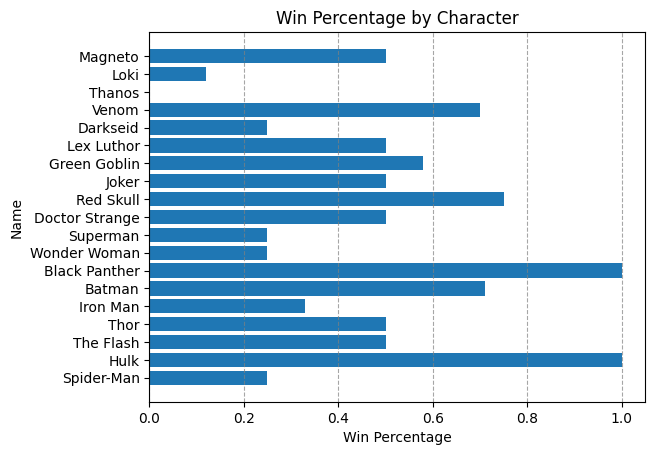

In [53]:
import matplotlib.pyplot as plt

# Plot winning percentages

# Pull battle data to a dataframe
battles = pd.read_sql_query("""
  SELECT heroes.name, villains.name, battles.outcome
  FROM battles
  INNER JOIN heroes ON battles.hero_id = heroes.id
  INNER JOIN villains ON battles.villain_id = villains.id
""", connection)

# Close and commit connection
connection.commit()
connection.close()

# Renaming columns
battles.columns.values[0] = 'hero'
battles.columns.values[1] = 'villain'

# Get all characters who have battled, and create iterables to track their wins
all_people = pd.concat([battles['hero'], battles['villain']]).unique()
num_battles = {x: 0 for x in all_people}
num_wins = {x: 0 for x in all_people}

# Iterate through each battle
for _, row in battles.iterrows():
  hero = row['hero']
  villain = row['villain']
  outcome = row['outcome']

  # Adding to number of battles
  num_battles[hero] += 1
  num_battles[villain] += 1

  # Adding to number of wins
  if outcome.startswith('Hero'):
    num_wins[hero] += 1
  elif outcome.startswith('Villain'):
    num_wins[villain] += 1
  else:
    num_wins[hero] += 0.5
    num_wins[villain] += 0.5

# Create dataframe to show percentages
wins = pd.DataFrame({
    "name": list(num_battles.keys()),
    "percent": [round((num_wins[name] / num_battles[name]), 2) for name in num_battles.keys()],
})

plt.barh(wins['name'], wins['percent'])
plt.xlabel('Win Percentage')
plt.ylabel('Name')
plt.title('Win Percentage by Character')
plt.grid(True, axis='x', linestyle='--', color='gray', alpha=0.7)
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!